### Import Libraries

In [1]:
# importing necessary libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary
from dmba import exhaustive_search
from dmba import liftChart, gainsChart
from dmba import adjusted_r2_score,AIC_score, BIC_score
from dmba import backward_elimination, forward_selection, stepwise_selection

In [2]:
# import csv

df = pd.read_csv('dataset.csv')

In [3]:
# check data
print(df.head(10))

   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
5   6     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  12950         32   
6   7   TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  16900         27   
7   8   TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8   9     TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
9  10     TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors  12950         23   

   Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ... Powered_Windows  \
0         10      2002  46986    Diesel   90          1  ...               1   
1         10  

### Predictors list

In [4]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors','Quarterly_Tax','Mfr_Guarantee','Guarantee_Period'
             ,'Airco','Automatic_airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar']

In [5]:
# Partition data into predictors (x) and output (y)

x = pd.get_dummies(df[predictors], drop_first=True)
y = df['Price']

In [6]:
# Check predictor values

print(x.head(10))

   Age_08_04     KM   HP  Automatic  Doors  Quarterly_Tax  Mfr_Guarantee  \
0         23  46986   90          0      3            210              0   
1         23  72937   90          0      3            210              0   
2         24  41711   90          0      3            210              1   
3         26  48000   90          0      3            210              1   
4         30  38500   90          0      3            210              1   
5         32  61000   90          0      3            210              0   
6         27  94612   90          0      3            210              0   
7         30  75889   90          0      3            210              1   
8         27  19700  192          0      3            100              0   
9         23  71138   69          0      3            185              0   

   Guarantee_Period  Airco  Automatic_airco  CD_Player  Powered_Windows  \
0                 3      0                0          0                1   
1            

### Dataset Split

In [8]:
# split data

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)

In [9]:
train_x.to_csv('TrainingDataToyotaCorolla.csv')
valid_x.to_csv('TestingDataToyotaCorolla.csv')

In [10]:
print("Training data:",train_x,"\nTesting data:",valid_x)

Training data:       Age_08_04      KM   HP  Automatic  Doors  Quarterly_Tax  Mfr_Guarantee  \
674          68  104000   86          0      3             19              0   
1221         73   84988  110          0      3             69              0   
991          58   43000  110          1      4             72              0   
323          44   36066  110          0      3             69              1   
842          61   66259  110          0      3             85              0   
...         ...     ...  ...        ...    ...            ...            ...   
715          62   90000  110          0      3             69              0   
905          65   59000  110          0      3             69              0   
1096         75  125400  110          0      3             69              0   
235          38   60829  110          0      5             85              1   
1061         78  161775   86          0      3             69              0   

      Guarantee_Period  

### Multiple Linear Regression (MLR)

In [11]:
# Build Model
mlr_df = LinearRegression()
mlr_df.fit(train_x, train_y)

# Print coefficients and intercept
coeff_x = pd.DataFrame({'Predictor': x.columns, 'coefficient': mlr_df.coef_})
icpt = mlr_df.intercept_

print("intercept:",icpt,"\n",coeff_x)

intercept: 8938.461789159051 
            Predictor  coefficient
0          Age_08_04  -109.397665
1                 KM    -0.018618
2                 HP    35.905713
3          Automatic   636.690827
4              Doors   178.071874
5      Quarterly_Tax    17.859801
6      Mfr_Guarantee   151.621827
7   Guarantee_Period    88.401193
8              Airco   122.315395
9    Automatic_airco  3057.278177
10         CD_Player   297.424406
11   Powered_Windows   483.123756
12       Sport_Model   420.040114
13           Tow_Bar  -211.503983
14  Fuel_Type_Diesel  2065.210989
15  Fuel_Type_Petrol  2207.252174


In [15]:
# Use predict() to make predictions on a new set
mlr_df_pred = mlr_df.predict(valid_x)

car_specs=pd.DataFrame(valid_x).head(5)
result = pd.DataFrame({'Predicted': mlr_df_pred, 'Actual': valid_y, 'Residual': valid_y - mlr_df_pred})
print(car_specs)
print("Prediction for first 5 rows:")
print(result.head(5))

      Age_08_04      KM   HP  Automatic  Doors  Quarterly_Tax  Mfr_Guarantee  \
509          46   53700   97          0      5             85              1   
435          53   79800  110          0      5             85              1   
321          36   36269  110          0      5             85              0   
1055         70  178800   72          0      3            185              0   
288          44   44218   97          0      5             85              1   

      Guarantee_Period  Airco  Automatic_airco  CD_Player  Powered_Windows  \
509                  3      0                0          1                1   
435                  3      0                0          0                0   
321                  3      1                0          1                1   
1055                 3      0                0          0                0   
288                  3      0                0          1                0   

      Sport_Model  Tow_Bar  Fuel_Type_Diesel  Fuel

In [25]:
# print performance measures (training data)
regressionSummary(train_y, mlr_df.predict(train_x))

rmse_lreg = np.sqrt(mean_squared_error(valid_y, mlr_df_pred))
train_reg_score=mlr_df.score(train_x,train_y)
test_reg_score=mlr_df.score(valid_x,valid_y)
print("\nTraining score:",train_reg_score)
print("Testing score:",test_reg_score)
print("RMSE for validation test of outcome: ",rmse_lreg)


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1216.0483
            Mean Absolute Error (MAE) : 905.9787
          Mean Percentage Error (MPE) : -0.9967
Mean Absolute Percentage Error (MAPE) : 8.9462

Training score: 0.8892187048433319
Testing score: 0.8876133435515805
RMSE for validation test of outcome:  1193.2034893016653


### Feature Selection
#### Relationship Scatterplot

<AxesSubplot:xlabel='Tow_Bar', ylabel='Price'>

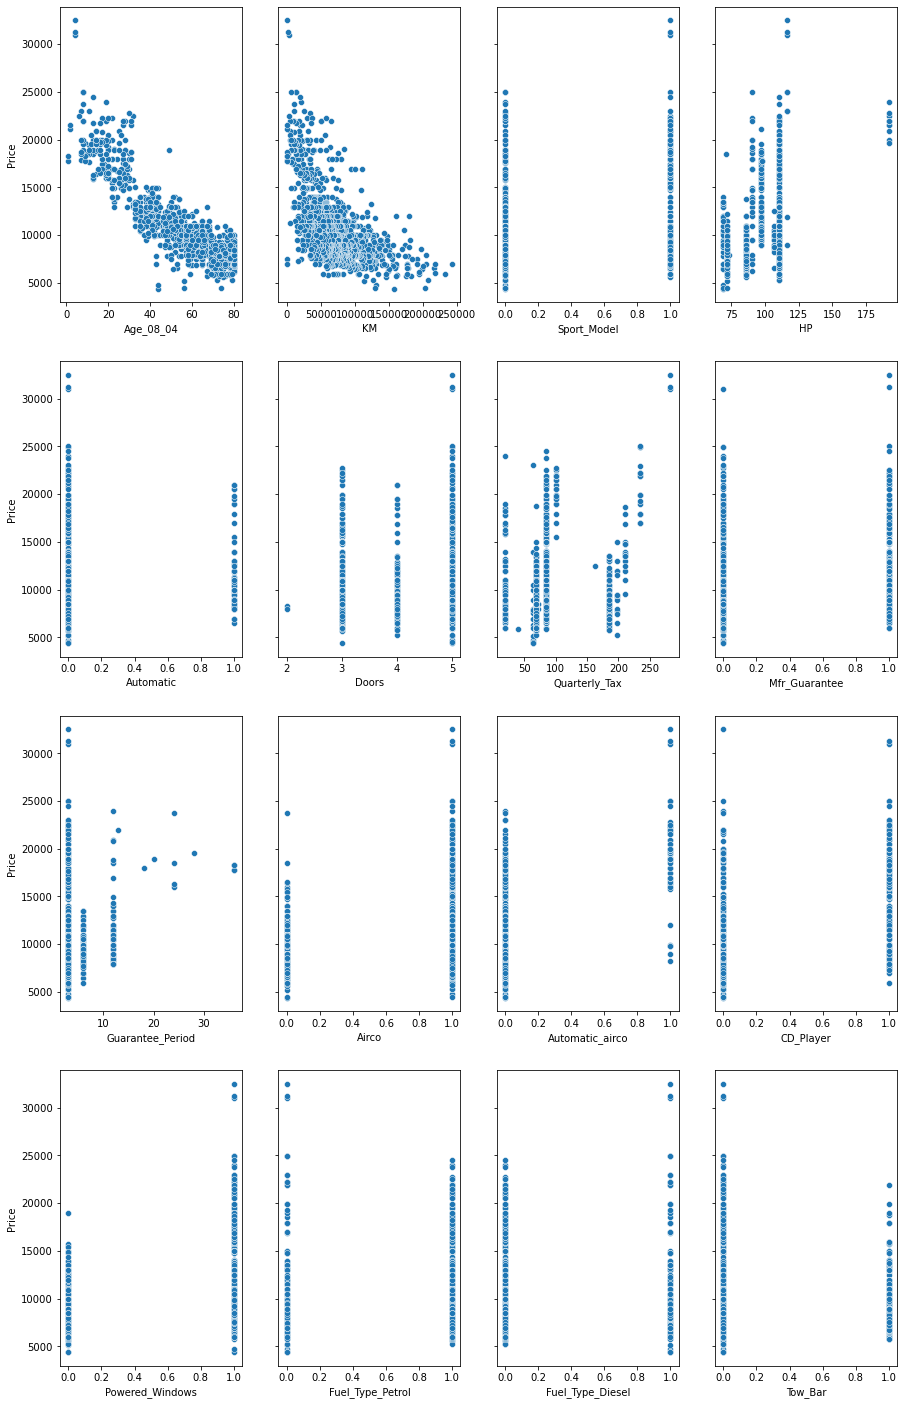

In [14]:
fig, axes = plt.subplots(4,4,figsize=(15,25),sharey=True)
sns.scatterplot(ax=axes[0, 0], x=x['Age_08_04'],y=df['Price'])
sns.scatterplot(ax=axes[0, 1], x=x['KM'],y=df['Price'])
sns.scatterplot(ax=axes[0, 2], x=x['Sport_Model'],y=df['Price'])
sns.scatterplot(ax=axes[0, 3], x=x['HP'],y=df['Price'])
sns.scatterplot(ax=axes[1, 0], x=x['Automatic'],y=df['Price'])
sns.scatterplot(ax=axes[1, 1], x=x['Doors'],y=df['Price'])
sns.scatterplot(ax=axes[1, 2], x=x['Quarterly_Tax'],y=df['Price'])
sns.scatterplot(ax=axes[1, 3], x=x['Mfr_Guarantee'],y=df['Price'])
sns.scatterplot(ax=axes[2, 0], x=x['Guarantee_Period'],y=df['Price'])
sns.scatterplot(ax=axes[2, 1], x=x['Airco'],y=df['Price'])
sns.scatterplot(ax=axes[2, 2], x=x['Automatic_airco'],y=df['Price'])
sns.scatterplot(ax=axes[2, 3], x=x['CD_Player'],y=df['Price'])
sns.scatterplot(ax=axes[3, 0], x=x['Powered_Windows'],y=df['Price'])
sns.scatterplot(ax=axes[3, 1], x=x['Fuel_Type_Petrol'],y=df['Price'])
sns.scatterplot(ax=axes[3, 2], x=x['Fuel_Type_Diesel'],y=df['Price'])
sns.scatterplot(ax=axes[3, 3], x=x['Tow_Bar'],y=df['Price'])

#### Correlation

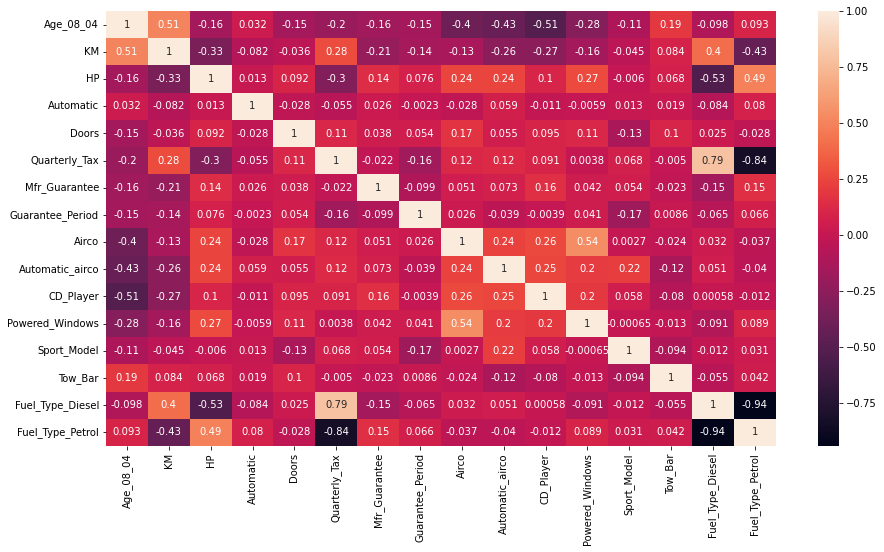

In [17]:
corrMatrix = x.corr()
plt.figure(figsize = (15,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [18]:
allVariables = train_x.columns
allVariables

Index(['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax',
       'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 'Automatic_airco',
       'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

#### Train and score functions

In [19]:
# create functions to pass into search algorithms
# 1. train_model -> contains multiple regression model
# 2. score_model_r2 -> returns adjusted r^2 score
# 3. score_model_aic -> returns aic

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_x[list(variables)], train_y)
    return model

def score_model_r2(model,variables):
    pred_y = model.predict(train_x[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

def score_model_aic(model,variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_x[variables]), model)

def score_model_bic(model,variables):
    if len(variables) == 0:
        return BIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return BIC_score(train_y, model.predict(train_x[variables]), model)

#### Feature selection algorithm functions

In [20]:
# Different methods to determine subset of predictors which best describe the 'price'.
# 1. return_ex_srch -> exhaustive search method
# 2. return_fwd_sel -> forward selection
# 3. return_bwd_sel -> backward selection
# 4. return_sw_sel -> StepWise selection

def return_ex_srch():
    results = exhaustive_search(allVariables, train_model, score_model_r2)
    print(results)
    data = []
    for result in results:
        model = result['model']
        variables = list(result['variables'])
        AIC = AIC_score(train_y, model.predict(train_x[variables]), model)
        d = {'n': result['n'], 'r2adj': -result['score'], 'AIC':AIC}
        d.update({var: var in result['variables'] for var in allVariables})
        data.append(d)
    
    data_df = pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))
    
    print(data_df)

def return_fwd_sel():
    best_model, best_variables = forward_selection(allVariables, train_model, score_model_aic, verbose=True)
    print(best_variables)
    regressionSummary(valid_y, best_model.predict(valid_x[best_variables]))

def return_bwd_sel():
    best_model, best_variables = backward_elimination(allVariables, train_model,score_model_aic, verbose=True)
    print(best_variables)
    regressionSummary(valid_y, best_model.predict(valid_x[best_variables]))
    
def return_sw_sel():
    best_model, best_variables = stepwise_selection(allVariables, train_model, score_model_bic, verbose=True)
    print(best_variables)
    regressionSummary(valid_y, best_model.predict(valid_x[best_variables]))

#### Exhaustive Search

In [37]:
return_ex_srch()

[{'n': 1, 'variables': ['Age_08_04'], 'score': -0.7623249776744156, 'model': LinearRegression()}, {'n': 2, 'variables': ['Age_08_04', 'Automatic_airco'], 'score': -0.8181308175986638, 'model': LinearRegression()}, {'n': 3, 'variables': ['Age_08_04', 'HP', 'Automatic_airco'], 'score': -0.8407266905905029, 'model': LinearRegression()}, {'n': 4, 'variables': ['Age_08_04', 'KM', 'HP', 'Automatic_airco'], 'score': -0.8508329918894434, 'model': LinearRegression()}, {'n': 5, 'variables': ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Automatic_airco'], 'score': -0.8702198996182408, 'model': LinearRegression()}, {'n': 6, 'variables': ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Automatic_airco', 'Powered_Windows'], 'score': -0.8747112866758042, 'model': LinearRegression()}, {'n': 7, 'variables': ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Guarantee_Period', 'Automatic_airco', 'Powered_Windows'], 'score': -0.8776573345275228, 'model': LinearRegression()}, {'n': 8, 'variables': ['Age_08_04', 'KM', '

#### Forward Selection

In [21]:
return_fwd_sel()

Variables: Age_08_04, KM, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=19345.02, constant
Step: score=17901.99, add Age_08_04
Step: score=17634.03, add Automatic_airco
Step: score=17501.70, add HP
Step: score=17436.81, add KM
Step: score=17297.88, add Quarterly_Tax
Step: score=17263.48, add Powered_Windows
Step: score=17240.56, add Guarantee_Period
Step: score=17221.92, add Sport_Model
Step: score=17208.93, add Doors
Step: score=17198.25, add Automatic
Step: score=17193.70, add CD_Player
Step: score=17190.71, add Tow_Bar
Step: score=17188.05, add Fuel_Type_Petrol
Step: score=17166.79, add Fuel_Type_Diesel
Step: score=17165.39, add Mfr_Guarantee
Step: score=17165.39, add None
['Age_08_04', 'Automatic_airco', 'HP', 'KM', 'Quarterly_Tax', 'Powered_Windows', 'Guarantee_Period', 'Sport_Model', 'Doors', 'Automatic', 'CD_Player', 'Tow_Bar', 'Fuel_T

#### Backward Selection

In [22]:
return_bwd_sel()

Variables: Age_08_04, KM, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=17165.82
Step: score=17165.39, remove Airco
Step: score=17165.39, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Doors', 'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 'Tow_Bar', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']

Regression statistics

                      Mean Error (ME) : 105.0346
       Root Mean Squared Error (RMSE) : 1195.8580
            Mean Absolute Error (MAE) : 928.3259
          Mean Percentage Error (MPE) : 0.2778
Mean Absolute Percentage Error (MAPE) : 9.2155


#### Step-Wise Selection

In [23]:
return_sw_sel()

Variables: Age_08_04, KM, HP, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=19354.85, constant
Step: score=17916.72, add Age_08_04
Step: score=17653.68, add Automatic_airco
Step: score=17526.26, add HP
Step: score=17466.28, add KM
Step: score=17332.27, add Quarterly_Tax
Step: score=17302.78, add Powered_Windows
Step: score=17284.77, add Guarantee_Period
Step: score=17271.05, add Sport_Model
Step: score=17262.97, add Doors
Step: score=17257.20, add Automatic
Step: score=17257.20, unchanged None
['Age_08_04', 'Automatic_airco', 'HP', 'KM', 'Quarterly_Tax', 'Powered_Windows', 'Guarantee_Period', 'Sport_Model', 'Doors', 'Automatic']

Regression statistics

                      Mean Error (ME) : 89.7463
       Root Mean Squared Error (RMSE) : 1224.0394
            Mean Absolute Error (MAE) : 953.6675
          Mean Percentage Error (MPE) : 0.0031
Mea

#### Predictions using selected features

In [35]:
updated_train_x=train_x[['HP','Age_08_04','Automatic_airco','KM']]
updated_test_x=valid_x[['HP','Age_08_04','Automatic_airco','KM']]

In [36]:
up_reg = LinearRegression()
up_reg.fit(updated_train_x, train_y)

preds = up_reg.predict(updated_test_x)

result = pd.DataFrame({'Predicted': preds, 'Actual': valid_y, 'Residual': valid_y - preds})
print("Prediction for first 5 rows:")
print(result.head(5))

regressionSummary(valid_y, up_reg.predict(updated_test_x))
train_reg_score=up_reg.score(updated_train_x,train_y)
test_reg_score=up_reg.score(updated_test_x,valid_y)

print("\nTraining score:",train_reg_score)
print("Testing score:",test_reg_score)

Prediction for first 5 rows:
         Predicted  Actual     Residual
509   11876.035273   10900  -976.035273
435   11019.273559   10895  -124.273559
321   13841.113954   10750 -3091.113954
1055   6342.272723    6500   157.727277
288   12260.933921   11895  -365.933921

Regression statistics

                      Mean Error (ME) : 120.9142
       Root Mean Squared Error (RMSE) : 1360.4049
            Mean Absolute Error (MAE) : 1041.5087
          Mean Percentage Error (MPE) : -0.0477
Mean Absolute Percentage Error (MAPE) : 10.2051

Training score: 0.8514272827584097
Testing score: 0.8539094574735533


#### Data Scaling

In [45]:
std_scaler = StandardScaler()

def scale_split_data(x):
    data=std_scaler.fit_transform(x)
    # return splitted Data
    return train_test_split(data, y, test_size=0.3, random_state=1)

#### KNN

In [46]:
def knn_model(n):
    train_x, valid_x, train_y, valid_y = scale_split_data(x)

    #global test_preds,rmse_knn_train_n,train_knn_score,test_knn_score,rmse_knn_test_n
    
    knn_model = KNeighborsRegressor(n_neighbors=n)
    knn_model.fit(train_x,train_y)
    
    train_knn_score=knn_model.score(train_x,train_y)
    print("\nTraining score:",train_knn_score)
    
    train_preds = knn_model.predict(train_x)
    
    test_knn_score=knn_model.score(valid_x,valid_y)
    print("Testing score:",test_knn_score)
    
    test_preds = knn_model.predict(valid_x)
    print(valid_y)
    
    mse = mean_squared_error(train_y, train_preds)
    rmse_knn_train_n = np.sqrt(mse)
    print("\nRMSE (Training set): ",rmse_knn_train_n)
    
    mse = mean_squared_error(valid_y, test_preds)
    rmse_knn_test_n = np.sqrt(mse)
    print("RMSE: (Testing/Validation set):",rmse_knn_test_n)
    
    result = pd.DataFrame({'Predicted': test_preds, 'Actual': valid_y, 'Residual': valid_y - test_preds})
    print("Prediction for first 5 rows:")
    print(result.head(5))
    
    return [rmse_knn_train_n,rmse_knn_test_n,train_knn_score,test_knn_score]
    

In [48]:
print("KNN with k=5:")
scores_5 = knn_model(5)

print("\nKNN with k=10:")
scores_10 = knn_model(10)

KNN with k=5:

Training score: 0.8835979133101637
Testing score: 0.8413864350888085
509     10900
435     10895
321     10750
1055     6500
288     11895
        ...  
1430     8450
868      9950
478     10500
1173     6950
419      8950
Name: Price, Length: 431, dtype: int64

RMSE (Training set):  1246.5164037731802
RMSE: (Testing/Validation set): 1417.5138219616895
Prediction for first 5 rows:
      Predicted  Actual  Residual
509     12349.0   10900   -1449.0
435     10899.0   10895      -4.0
321     12700.0   10750   -1950.0
1055     7840.0    6500   -1340.0
288     10990.0   11895     905.0

KNN with k=10:

Training score: 0.8427523986197278
Testing score: 0.8503870152579098
509     10900
435     10895
321     10750
1055     6500
288     11895
        ...  
1430     8450
868      9950
478     10500
1173     6950
419      8950
Name: Price, Length: 431, dtype: int64

RMSE (Training set):  1448.8039785865303
RMSE: (Testing/Validation set): 1376.7078309791625
Prediction for first 5 ro

#### SVM

In [49]:
y = df['Price']

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.3, random_state=1)

s=svm.SVC()
s.fit(train_x,train_y)

SVC()

In [50]:
s_train_score=s.score(train_x,train_y)
print("\nTraining score:",s_train_score)
    
train_preds = s.predict(train_x)
    
s_test_score=s.score(valid_x,valid_y)
print("Testing score:",s_test_score)

test_preds = s.predict(valid_x)

mse = mean_squared_error(train_y, train_preds)
rmse_train = np.sqrt(mse)
print("\nRMSE (Training set): ",rmse_train)

mse = mean_squared_error(valid_y, test_preds)
rmse_test = np.sqrt(mse)
print("RMSE: (Testing/Validation set):",rmse_test)

result = pd.DataFrame({'Predicted': test_preds, 'Actual': valid_y, 'Residual': valid_y - test_preds})
print("\nPrediction for first 5 rows:\n")
print(result.head(5))


Training score: 0.08955223880597014
Testing score: 0.07888631090487239

RMSE (Training set):  3694.0658617632653
RMSE: (Testing/Validation set): 3620.4576872861303

Prediction for first 5 rows:

      Predicted  Actual  Residual
509        8950   10900      1950
435        8950   10895      1945
321        9950   10750       800
1055       7950    6500     -1450
288        9950   11895      1945


#### Model Comparison

In [51]:
Models1= [('Linear ', train_reg_score, test_reg_score, rmse_lreg),
          ('kNN-5 ', scores_5[2],scores_5[3],scores_5[1]),
          ('kNN-10 ', scores_10[2],scores_10[3],scores_10[1]),
          ('SVM ', s_train_score, s_test_score, rmse_test)]

stats = pd.DataFrame(data = Models1, columns = ['Models', 'Score_Train', 'Score_Test', 'RMSE'])

(0.0, 1.0)

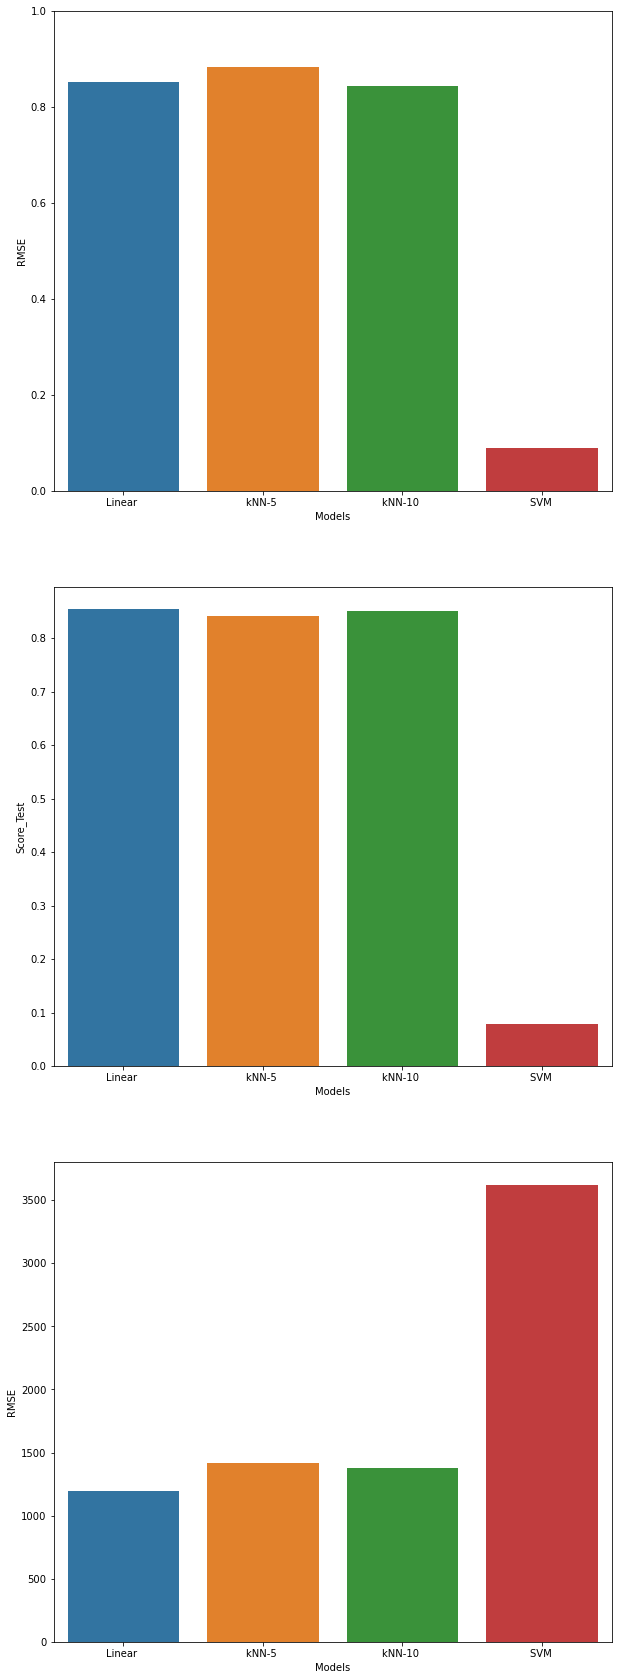

In [53]:
# Model comparison through RMSE
f, axes = plt.subplots(3,1, figsize=(10, 30))
sns.barplot(x='Models', y='Score_Train', data = stats, ax = axes[0])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score_Train')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='Score_Test', data = stats, ax = axes[1])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score_Test')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='RMSE', data = stats, ax = axes[2])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_ylim(0,1.0)